# Exercise 18

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import string
import nltk

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
Sexo    42 non-null object
T1      41 non-null object
T2      30 non-null object
T3      30 non-null object
T4      36 non-null object
T5      35 non-null object
T6      29 non-null object
dtypes: object(7)
memory usage: 2.4+ KB


In [3]:
text1=data.fillna("")
text2=data.fillna("")
text3=data.fillna("")
text4=data.fillna("")

In [4]:
texts=["T1","T2","T3","T4","T5","T6"]
for text in texts:
    text1[text]=text1[text].apply(lambda x: len(x) - x.count(" "))

In [5]:
#Promedio de palabras por estudiante
text1["avg_words"]=(text1["T1"]+text1["T2"]+text1["T3"]+text1["T4"]+text1["T5"]+text1["T6"])/6
text1.head()

,Sexo,T1,T2,T3,T4,T5,T6,avg_words
0,H,1891,0,3141,0,2708,1991,1621.833333
1,H,1282,1493,0,1490,1426,1503,1199.000000
2,H,1736,1679,1693,1537,1206,1485,1556.000000
3,M,1571,1528,1700,1245,2078,0,1353.666667
4,H,1591,1574,1239,1321,1442,1409,1429.333333


In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [7]:
texts=["T1","T2","T3","T4","T5","T6"]
for text in texts:
    text3[text]=text3[text].apply(lambda x: str(x))

In [8]:
texts=["T1","T2","T3","T4","T5","T6"]
for text in texts:
    text3[text]=text3[text].apply(lambda x: len(sent_tokenize(x)))

In [9]:
#Promedio de frases por estudiante
text3["avg_sent"]=(text3["T1"]+text3["T2"]+text3["T3"]+text3["T4"]+text3["T5"]+text3["T6"])/6
text3.head()

,Sexo,T1,T2,T3,T4,T5,T6,avg_sent
0,H,16,0,26,0,18,17,12.833333
1,H,7,19,0,8,10,7,8.500000
2,H,5,26,5,3,3,5,7.833333
3,M,7,12,10,8,10,0,7.833333
4,H,7,7,8,7,8,8,7.500000


# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [10]:
text4["Texto"]=text4["T1"]+" "+text4["T2"]+" "+text4["T3"]+" "+text4["T4"]+" "+text4["T5"]+" "+text4["T6"]

In [11]:
!pip install textdistance

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
altair 2.2.2 requires typing, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import textdistance

In [13]:
X = text4["Texto"]
X.shape[0]

42

In [14]:
similarity1 = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        similarity1[i,j] = textdistance.overlap.similarity(X.iloc[i], X.iloc[j])

In [15]:
similarities1 = pd.DataFrame(similarity1)

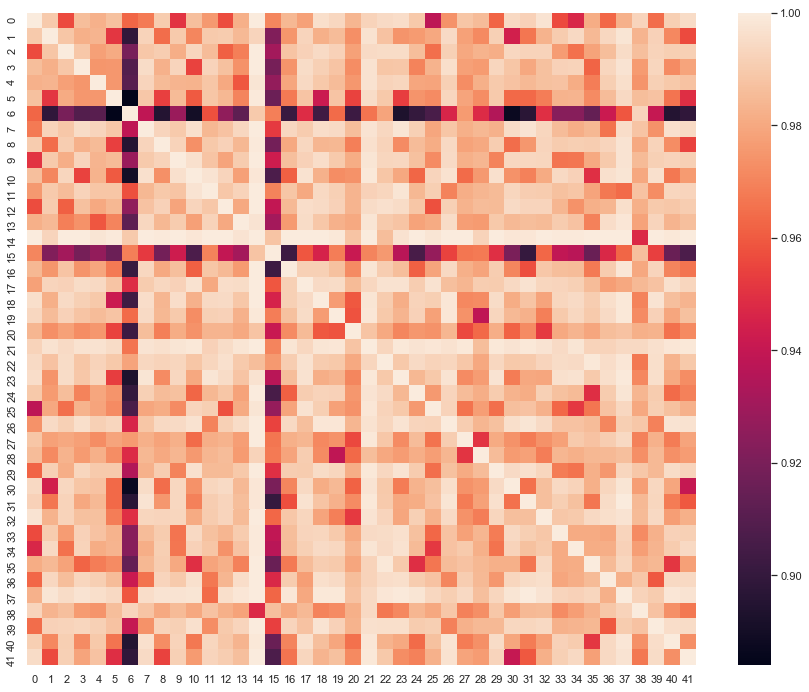

In [40]:
import seaborn as sns; sns.set()
plt.figure(figsize=(15, 12))
similar_hm1 = sns.heatmap(similarities1)

In [21]:
X = text4["Texto"]
X.shape[0]

42

In [22]:
similarity2 = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        similarity2[i,j] = textdistance.ratcliff_obershelp.distance(X.iloc[i], X.iloc[j])

In [23]:
similarities2 = pd.DataFrame(similarity2)

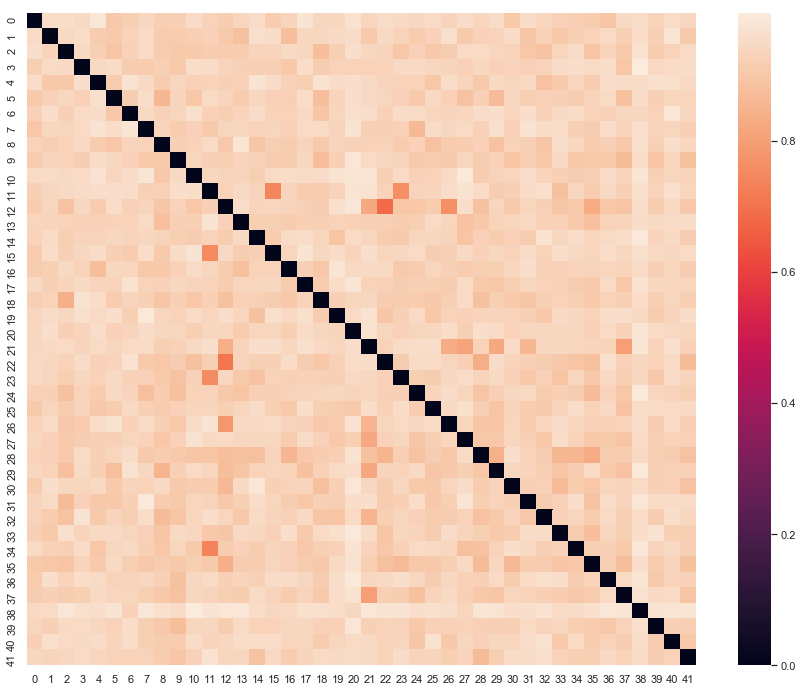

In [39]:
plt.figure(figsize=(15, 12))
similar_hm2 = sns.heatmap(similarities2)

# Exercise 18.3

Create a classifier to predict the sex of each student



In [33]:
vect = TfidfVectorizer()
X_dtm = vect.fit_transform(X)
y=text4["Sexo"]

In [34]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=9)

clf = RandomForestClassifier(n_jobs=-1,n_estimators=300, random_state=9)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
metrics.accuracy_score(y_test,y_pred)

0.9230769230769231